TASK 6A

In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
y = data['CDRGLOB']
x = data.drop(['CDRGLOB'], axis=1)

In [2]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0, train_size = 0.2)

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print("Accuracy:", accuracy_score(ytest, y_pred))

Accuracy: 0.6088560885608856


In [4]:
from sklearn.model_selection import cross_val_score
a5 = cross_val_score(model, x, y, cv=5)
a10 = cross_val_score(model, x, y, cv=10)

In [5]:
print("k=5 için std:", a5.std())
print("k=10 için std:", a10.std())

print("k=5 için ortalama:", a5.mean())
print("k=10 için ortalama:", a10.mean())


k=5 için std: 0.03979505605661516
k=10 için std: 0.09128257310207254
k=5 için ortalama: 0.610755774224409
k=10 için ortalama: 0.6144553376906319


Low sd is always better.

*__TASK 6B__*

Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values.

In [6]:
from sklearn.ensemble import RandomForestClassifier
y = data['CDRGLOB']
x = data.drop(['CDRGLOB'], axis=1)

xtrainrf, xtestrf, ytrainrf, ytestrf = train_test_split(x, y, test_size=0.2)

rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(xtrainrf,ytrainrf)

ypredrf=rfc.predict(xtestrf)

print("Accuracy of RandomForest:", accuracy_score(ytestrf, ypredrf))

Accuracy of RandomForest: 0.6346863468634686


*__TASK-6C__*

 Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

Text(0.5, 0, 'RPARCORT')

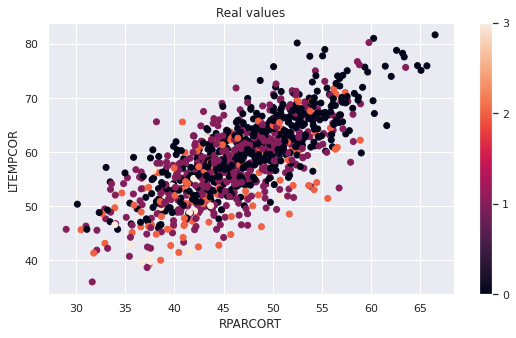

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.scatter(xtest["RPARCORT"], xtest["LTEMPCOR"],c = ytest)
plt.colorbar(ticks = [0,1,2,3])
plt.title("Real values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")

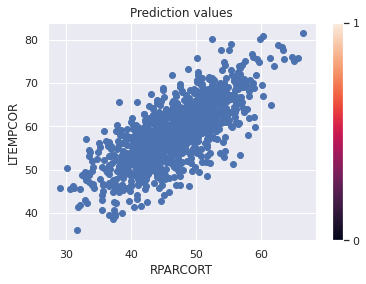

In [32]:
plt.scatter(xtest["RPARCORT"], xtest["LTEMPCOR"], c = )
plt.colorbar(ticks = [0,1,2,3])
plt.title("Prediction values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

***TASK-6D***

Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 



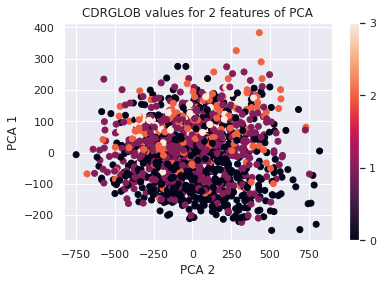

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_trans = pca.fit_transform(x)
plt.figure()
plt.scatter(pca_trans [:,0] , pca_trans[:,1], c = y)
plt.colorbar(ticks = [0,1,2,3])
plt.title("CDRGLOB values for 2 features of PCA")
plt.ylabel("PCA 1")
plt.xlabel("PCA 2")
plt.show()

***TASK-6E ***

Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 

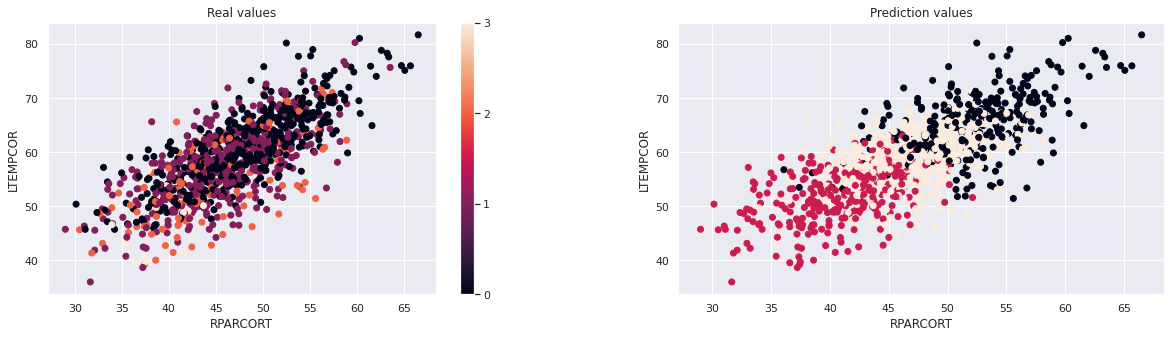

0.29797047970479706

In [39]:
from sklearn.cluster import KMeans
modelk = KMeans(n_clusters=3)
modelk = modelk.fit(xtrain,ytrain).predict(xtest)

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.scatter(xtest["RPARCORT"], xtest["LTEMPCOR"],c=ytest)
plt.colorbar(ticks=[0,1,2,3])
plt.title("Real values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 2, 2)
plt.scatter(xtest["RPARCORT"], xtest["LTEMPCOR"],c = modelk)
plt.title("Prediction values")
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show()
accuracy_score(ytest, modelk)